In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import numpy as np
import argparse
import cv2
import os
from imutils import paths
import imutils
from random import shuffle

C:\Users\Francis Buendia\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def img_to_feature_vec(image, size=(80, 80)):
    #resize image to fixed size, then flatten
    return cv2.resize(image, size).flatten()

In [3]:
imagePaths = list(paths.list_images("knn_dataset"))
image_data = [] # stores 
labels = []

In [4]:
for (i, image_path) in enumerate(imagePaths):
    image = cv2.imread(image_path)
    # file name is in format cat.0.jpg
    # image_path.split(os.path.sep)[-1]  = cat.0.jpg
    # image_path.split(os.path.sep)[-1].split(".") parses the cat.0.jpg into an array split by periods
    # image_path.split(os.path.sep)[-1].split(".")[0] gets first element which is the image label
    label = image_path.split(os.path.sep)[-1].split(".")[0]  
    img_pixels = img_to_feature_vec(image) #pixels of image in a 1D array
    image_data.append(img_pixels)
    labels.append(label)
    if i > 0 and i%1000 == 0: 
        print("Processed: ", i, " images")
print("Done processing images and assigning labels")
image_data = np.array(image_data)
labels = np.array(labels)

Processed:  1000  images
Processed:  2000  images
Processed:  3000  images
Processed:  4000  images
Processed:  5000  images
Processed:  6000  images
Processed:  7000  images
Processed:  8000  images
Processed:  9000  images
Processed:  10000  images
Processed:  11000  images
Processed:  12000  images
Processed:  13000  images
Processed:  14000  images
Processed:  15000  images
Processed:  16000  images
Processed:  17000  images
Processed:  18000  images
Processed:  19000  images
Processed:  20000  images
Processed:  21000  images
Processed:  22000  images
Processed:  23000  images
Processed:  24000  images
Done processing images and assigning labels


In [6]:
(train_img, test_img, train_label, test_label) = train_test_split(image_data, labels, test_size=0.20, random_state=47)

In [7]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_img, train_label)
acc = knn_model.score(test_img, test_label)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 55.76%


['cat']


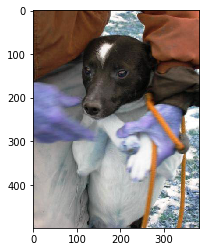

['cat']


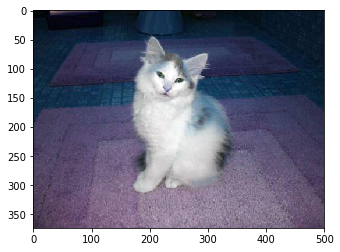

['cat']


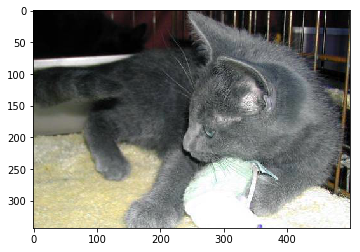

['cat']


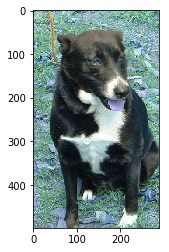

['dog']


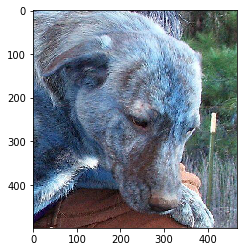

['dog']


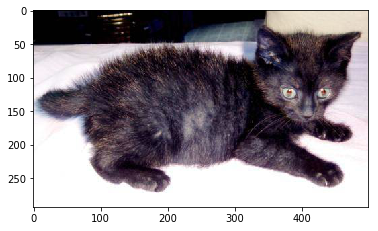

['cat']


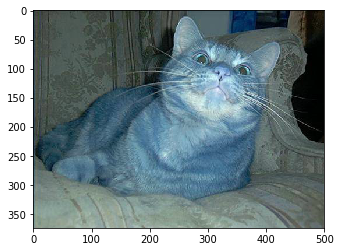

['dog']


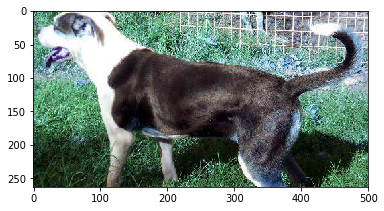

['dog']


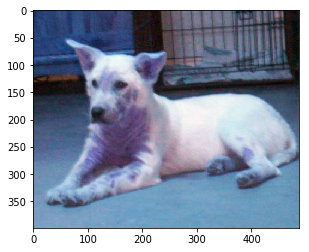

['cat']


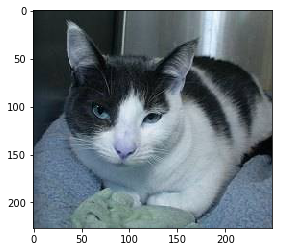

['cat']


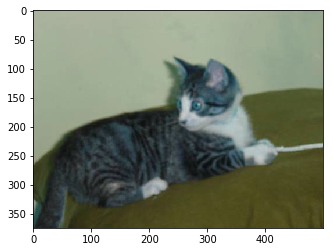

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#predict with test data
testPath = list(paths.list_images("test1"))
for (i, image_path) in enumerate(testPath):
    image = cv2.imread(image_path)
    img_pixels = img_to_feature_vec(image) #pixels of image in a 1D array
    print(knn_model.predict([img_pixels]))
    plt.imshow(image)
    plt.show()
    if i == 10:
        break